In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt
from scipy.spatial import procrustes
import scipy
import pdb
import math

%matplotlib inline


In [2]:
def sideLength(x1, y1, x2, y2):

    length = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return length

def tag(triangles):
    list_tag=[]
    for triangle in triangles:
        tag=typeObtuseRightAcute(triangle[0][0],triangle[0][1],triangle[1][0],
                                   triangle[1][1],triangle[2][0],triangle[2][1])
        if tag=="obtuse":
            list_tag.append(1)
        else: list_tag.append(0)   
    return list_tag

def typeObtuseRightAcute(x1, y1, x2, y2, x3, y3):
    #no idea if this is a good value but works for example
    #and should be low enough to give right answers for all but crazy close triangles
    epsilon=10**-8
    # Using Pythagoras theorem
    sideAB = sideLength(x1, y1, x2, y2)
    sideBC = sideLength(x2, y2, x3, y3)
    sideAC = sideLength(x3, y3, x1, y1)

    #use this instead
    [var1,var2,largest] = sorted([sideAB, sideBC, sideAC])



    if abs((largest) ** 2-((var1 ** 2 + (var2) ** 2)))<epsilon:
        return "right"
    elif (largest) ** 2 > ((var1 ** 2 + (var2) ** 2)):
        return "obtuse"
    else:
        return "acute"

def acute(x1,y1,x2,y2,x3,y3):
    return typeObtuseRightAcute(x1,y1,x2,y2,x3,y3)=="acute"

def right(x1,y1,x2,y2,x3,y3):
    return typeObtuseRightAcute(x1,y1,x2,y2,x3,y3)=="right"

def obtuse(x1,y1,x2,y2,x3,y3):
    return typeObtuseRightAcute(x1,y1,x2,y2,x3,y3)=="obtuse"

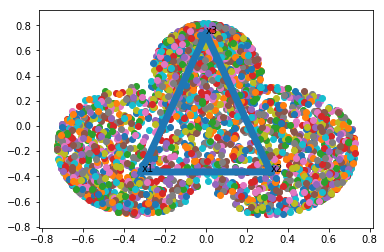

In [3]:
################## Superimposition of various triangles onto a regular one as reference ##############################


#Regular triangle
X = np.array([[0,0],[1,0],[0.5,sqrt(3)]])


#Calculate mean and move points to the center
muX = X.mean(0)
X0 = X-muX
#Calculate squared sum of X-X_mean
ssX = (X0**2.).sum()
#Calculate Frobenius norm
normX = np.sqrt(ssX)
#normalize to origin
X0 /= normX
t1 = plt.triplot(X0[:,0],X0[:,1],linewidth=7.0)

index_x=['x1','x2','x3']
for i, txt in enumerate(index_x):
    plt.annotate(txt, (X0[i,0],X0[i,1]))

nb_of_triangles=1000


singular_values=[]
list_triangles=[]

for i in range(nb_of_triangles):
    #Random triangle 
    Y = np.random.normal(0,1,(3,2))
                         
    #Y = np.array([[0.0,0],[0.5,0],[0.25,0.5*sqrt(3)]])
    
    #Mean of each coordinate
    muY = Y.mean(0)
    
    #Centralize data to the mean 
    Y0 = Y-muY
    
    
    #Squared sum of X-mean(X)
    ssY = (Y0**2.).sum()
    
    
    #Frobenius norm of X
    normY = np.sqrt(ssY)
    
    
    # scale to equal (unit) norm
    Y0 /= normY
    
    
    
    #Finding best rotation to superimpose on regular triangle
    #Applying SVD to the  matrix 
    A = np.dot(X0.T, Y0)
    U,s,Vt = np.linalg.svd(A,full_matrices=False)
    R = np.dot(U,Vt)
    
    singular_values.append(s)
    
    eigenvalues=np.sqrt(s)
    traceTA = s.sum()
        
    
    Y_transformed =np.dot(Y0,R.transpose())
    #
    #
    # d,Z,(transform)=procrustes(X,Y)
    #
    #
    n=['a1','a2','a3']
    #for i, txt in enumerate(n):
     #   plt.annotate(txt, (Y_transformed[i,0],Y_transformed[i,1]))
    #
    #
   # t2 = plt.triplot(Y_transformed[:,0],Y_transformed[:,1])
    plt.scatter(Y_transformed[:,0],Y_transformed[:,1])
    list_triangles.append(Y_transformed)
    #t3= plt.triplot(Z[:,0],Z[:,1])
    #plt.show()
p1,p2,p3=[],[],[]
for d in range(nb_of_triangles):
    p1.append(list_triangles[d][0])
    p2.append(list_triangles[d][1])
    p3.append(list_triangles[d][2])
p1,p2,p3=np.array(p1), np.array(p2),np.array(p3)  

    
mean_p1,mean_p2,mean_p3=p1.mean(0),p2.mean(0),p3.mean(0)

mean_p=np.array([mean_p1,mean_p2,mean_p3])    


#t1 = plt.triplot(mean_p[:,0],mean_p[:,1])
  


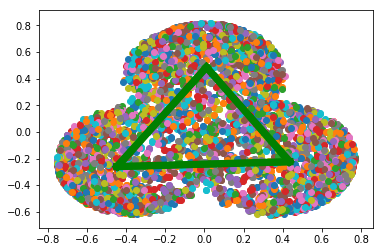

In [4]:
list_triangles_saved=[]
while True:
    old_mean_shape=mean_p
    
    #Calculate mean and move points to the center
    old_mumean_p =old_mean_shape.mean(0)
    old_mean_p0 = old_mean_shape-old_mumean_p
    #Calculate squared sum of X-X_mean
    ss_old_mean_p = (old_mean_p0**2.).sum()
    #Calculate Frobenius norm
    old_norm_mean_p = np.sqrt(ss_old_mean_p)
    #normalize to origin
    old_mean_p0 /= old_norm_mean_p
    
    new_list_triangles=[]
    for Y in list_triangles:
        #Mean of each coordinate
        muY = Y.mean(0)
     
        #Centralize data to the mean 
        Y0 = Y-muY
        
        
        #Squared sum of X-mean(X)
        ssY = (Y0**2.).sum()
        
        
        #Frobenius norm of X
        normY = np.sqrt(ssY)
        
        
        # scale to equal (unit) norm
        Y0 /= normY
        
                
        #Finding best rotation to superimpose on regular triangle
        #Applying SVD to the  matrix 
        A = np.dot(old_mean_p0.T, Y0)
        U,s,Vt = np.linalg.svd(A,full_matrices=False)
        R = np.dot(U,Vt)
        
        
        
        eigenvalues=np.sqrt(s)
        traceTA = s.sum()
            
        
        Y_transformed = np.dot(Y0,R.transpose()) 
        
        n=['a1','a2','a3']
        #for i, txt in enumerate(n):
         #   plt.annotate(txt, (Y_transformed[i,0],Y_transformed[i,1]))
        #
        #
        t2 = plt.scatter(Y_transformed[:,0],Y_transformed[:,1])
        new_list_triangles.append(Y_transformed)
    p1,p2,p3=[],[],[]
    for d in range(nb_of_triangles):
        p1.append(new_list_triangles[d][0])
        p2.append(new_list_triangles[d][1])
        p3.append(new_list_triangles[d][2])
    p1,p2,p3=np.array(p1), np.array(p2),np.array(p3)  
    
        
    mean_p1,mean_p2,mean_p3=p1.mean(0),p2.mean(0),p3.mean(0)
    
    mean_p=np.array([mean_p1,mean_p2,mean_p3])  
    t1 = plt.triplot(mean_p[:,0],mean_p[:,1],linewidth=7.0,c='g')   
    new_mean_shape=mean_p
   
    threshold=old_mean_shape-new_mean_shape
    
    list_triangles[:]=new_list_triangles[:]
    
    del new_list_triangles[:]
    if np.linalg.norm(threshold)<1e-2:  
        list_triangles_saved[:]=list_triangles
        break


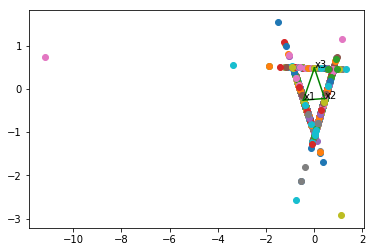

In [5]:
##### Projecting landmarks in tangent direction of their mean #######


p1,p2,p3=[],[],[]
for d in range(nb_of_triangles):
    p1.append(list_triangles_saved[d][0])
    p2.append(list_triangles_saved[d][1])
    p3.append(list_triangles_saved[d][2])

    
    
p1,p2,p3=np.array(p1), np.array(p2),np.array(p3)  
mean_p1,mean_p2,mean_p3=p1.mean(0),p2.mean(0),p3.mean(0)

triangles_with_tangent_projection=np.copy(list_triangles_saved)

for e in range(nb_of_triangles):
    sigma1=(np.linalg.norm(mean_p1,ord=2)**2)/np.dot(p1[e],mean_p1)
    triangles_with_tangent_projection[e][0]=sigma1*p1[e]
    sigma2=(np.linalg.norm(mean_p2,ord=2)**2)/np.dot(p2[e],mean_p2)
    triangles_with_tangent_projection[e][1]=sigma2*p2[e]
    sigma3=(np.linalg.norm(mean_p3,ord=2)**2)/np.dot(p3[e],mean_p3)
    triangles_with_tangent_projection[e][2]=sigma3*p3[e]



for triangle in triangles_with_tangent_projection:
    X_coord=[]
    Y_coord=[]
    for i in range(3):
        X_coord.append(triangle[i][0])
        Y_coord.append(triangle[i][1])
    X_coord_array=np.array(X_coord)
    Y_coord_array=np.array(Y_coord)
    plt.scatter(X_coord_array,Y_coord_array)
mean_shape=np.array([mean_p1,mean_p2,mean_p3])    
t1 = plt.triplot(mean_p[:,0],mean_p[:,1],c='g')
n=['x1','x2','x3']
for i,txt in enumerate(n):
    plt.annotate(txt,(mean_p[i,0],mean_p[i,1]))
##axes = plt.gca()
##axes.set_xlim([-1,1])
##axes.set_ylim([-1.5,1.5])


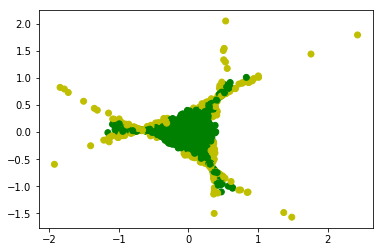

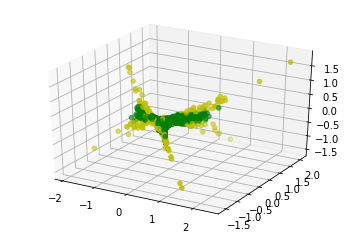

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


triangles_with_tangent_projection -=triangles_with_tangent_projection.mean(0)

triangles_concated=[]
for i in range(nb_of_triangles):
    triangles_concated.append(triangles_with_tangent_projection[i].reshape(6))

triangles_concated=np.array(triangles_concated)
covarience_matrix=np.cov(triangles_concated)
y=tag(triangles_with_tangent_projection)
y=np.array(y)
eigenValues, eigenVectors = np.linalg.eig(covarience_matrix)

idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
eigenVectors[0]

pca = PCA(n_components=2)
X_r = pca.fit(triangles_concated).transform(triangles_concated)
col=['y' if i==1 else 'g' for i in tag(triangles_with_tangent_projection)]
plt.scatter(X_r[:, 0], X_r[:, 1],c=col)

pca = PCA(n_components=3)
X_r2 = pca.fit(triangles_concated).transform(triangles_concated)
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_r2[:, 0], X_r2[:, 1],X_r2[:,2],c=col)


lda=LDA(n_components=3)
X_r3 = pca.fit(triangles_concated,y).transform(triangles_concated)

#plt.scatter(X_r3[:, 0], X_r3[:, 1],X_r3[:,2],c=col,marker='x')


In [25]:
#2D isomap #
from sklearn import manifold
import pandas as pd

iso = manifold.Isomap(n_neighbors=5, n_components=2)
iso.fit(triangles_concated)
manifold_2Da = iso.transform(triangles_concated)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])

# Left with 2 dimensions
manifold_2D.head()

,Component 1,Component 2
0,-0.135811,-0.050811
1,0.081412,-0.325453
2,-0.258687,-0.380134
3,0.219158,0.201046
4,-0.775367,-0.519992


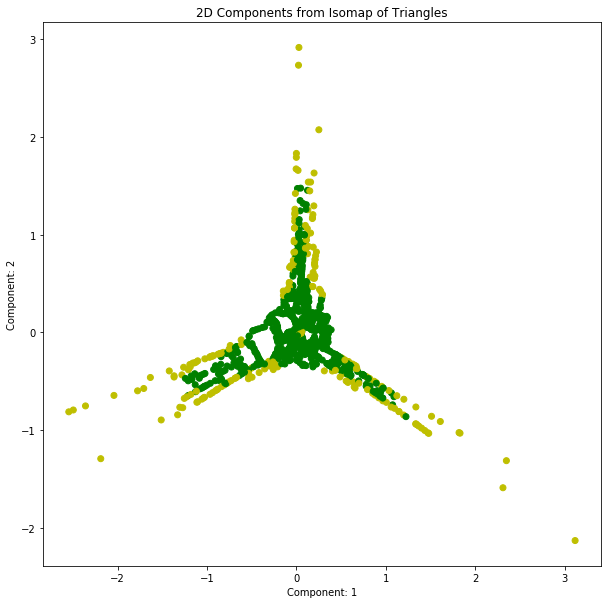

In [26]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax2 = fig.add_subplot(111)
ax2.set_title('2D Components from Isomap of Triangles')
ax2.set_xlabel('Component: 1')
ax2.set_ylabel('Component: 2')
ax2.scatter(manifold_2Da[:,0],manifold_2Da[:,1],c=col)

In [10]:
# 3D Isomap # 

iso = manifold.Isomap(n_neighbors=17, n_components=3)
iso.fit(triangles_concated)
manifold_3Da = iso.transform(triangles_concated)
manifold_3D = pd.DataFrame(manifold_3Da, columns=['Component 1', 'Component 2','Component 3'])

# Left with 2 dimensions
manifold_3D.head()

,Component 1,Component 2,Component 3
0,-0.172657,-0.035686,0.026190
1,0.067754,-0.297839,0.066973
2,-0.247519,-0.367340,0.054644
3,0.172558,0.181885,-0.044296
4,-0.650783,-0.434608,0.038846


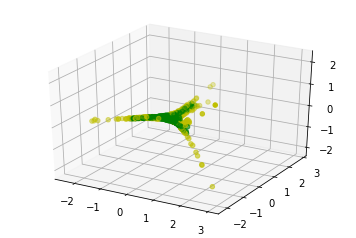

In [11]:
fig2=plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(manifold_3Da[:, 0], manifold_3Da[:, 1],manifold_3Da[:,2],c=col)

In [12]:
def gauss_rbf(y_i,y_j,epsilon=1e-1):
        norm=np.linalg.norm((y_i-y_j))    
        #return e**((-epsilon*norm)**2)
        #return sqrt(1+(epsilon*np.linalg.norm((y_i-y_j),ord=2))**2) 
        #return norm*6
        if norm==0:
            return 0
        else:
            return  (norm**2)*np.log(norm)

In [13]:
def Create_Matrix(Y):
    size=Y.shape[0]
    A=np.zeros((size,size))
    rows,columns=A.shape
    for i in range(rows):
        for j in range(columns):
            A[i][j]=gauss_rbf(Y[i],Y[j])
    return A
    

In [ ]:
A=Create_Matrix(manifold_3Da)
B=triangles_concated

In [28]:
#fit AX-B
weight_Matrix=np.linalg.lstsq(A,B)[0]

In [29]:
Predicted_matrix=np.dot(A,weight_Matrix)

In [30]:
error=np.linalg.norm(Predicted_matrix-B)
print(error)

1.05956277076e-10


In [31]:
triangles_concated[0]

array([-0.07336965,  0.12986814,  0.0277199 ,  0.04785976, -0.09283279,
       -0.00034665])

In [19]:
def get_K(point,Y):
    columns=Y.shape[0]
    array=np.zeros(columns)
    for j in range(columns):
        array[j]=gauss_rbf(point,Y[j])
    return array
    

[ 0.82636935 -0.60719962  0.21206718]


<function matplotlib.pyplot.show>

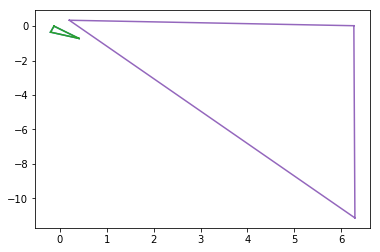

In [20]:
## Sample from latent space ##

print(manifold_3Da[6])
C_latent=np.array([8.84803236 ,1.61 ,5.11054413])
# Compute RBF for point C
K=get_K(C_latent,manifold_3Da)
# Find corresponding point in real space
C=K.dot(weight_Matrix)

t2=Predicted_matrix[6]
t1=triangles_concated[6]
t3=C

original=plt.triplot(t1[0::2],t1[1::2])
after_fitting=plt.triplot(t2[0::2],t2[1::2])
sample_from_latent=plt.triplot(t3[0::2],t3[1::2])
plt.show

In [21]:
#Calculate mean and move points to the center
muX = X.mean(0)
X0 = X-muX
#Calculate squared sum of X-X_mean
ssX = (X0**2.).sum()
#Calculate Frobenius norm
normX = np.sqrt(ssX)
#normalize to origin
X0 /= normX



Y = np.random.normal(0,2,(3,2))

array([ 1.12893554, -1.55944178,  0.43050624])

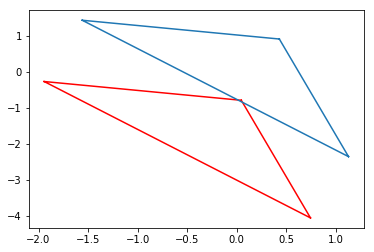

In [22]:
muY = Y.mean(0)
     
#Centralize data to the mean 
Y0 = Y-muY

X = np.array([[0,0],[1,0],[0.5,sqrt(3)]])
# reference triangle
#t1 = plt.triplot(X0[:,0],X0[:,1])
# Random shape
t2 = plt.triplot(Y[:,0],Y[:,1],c='r')
# Centralize shape
#t2 = plt.triplot(Y0[:,0],Y0[:,1])
# Scale it
#Squared sum of Y-mean(Y)
#ssY = (Y0**2.).sum()
# Frobenius norm of Y
#normY = np.sqrt(ssY)             
# scale to equal (unit) norm
#Y0/=normY

t3=plt.triplot(Y0[:,0],Y0[:,1])

Y0[:,0]
#Finding best rotation to superimpose on regular triangle
#Applying SVD to the  matrix 
      
#A = np.dot(X0.T, Y0)
#      
#U,s,Vt = np.linalg.svd(A,full_matrices=False)
#      
#R = np.dot(U,Vt)
#
#traceTA = s.sum()
#
#t3=plt.triplot(Y_rotated[:,0],Y_rotated[:,1])


In [23]:
a=np.array([[3,4],[5,2]])
b=np.array([[3],[2]])
x=np.linalg.solve(a,b)
print(a.dot(x))

[[ 3.]
 [ 2.]]
